# Maintenance des algorithmes

## Import library et base 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.datasets.loaders import load_nfl
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    RFM = pd.read_csv("/content/drive/MyDrive/Notebooks/P5 Git/RFM.csv")

except ModuleNotFoundError :
    RFM = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5 Git\RFM.csv')

Mounted at /content/drive


In [3]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96558 entries, 0 to 96557
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     96558 non-null  int64  
 1   customer_unique_id             96558 non-null  object 
 2   payment_value                  96558 non-null  float64
 3   first_order                    96558 non-null  object 
 4   last_order                     96558 non-null  object 
 5   Duration                       96558 non-null  object 
 6   Recence_date                   96558 non-null  object 
 7   Recence                        96558 non-null  float64
 8   order_count                    96558 non-null  int64  
 9   review_id                      96558 non-null  object 
 10  order_id                       96558 non-null  object 
 11  review_score                   96558 non-null  int64  
 12  review_comment_title           96558 non-null 

In [4]:
temp = RFM.drop(columns = 'Unnamed: 0')
RFM = temp

In [5]:
RFM.describe(include = 'all',datetime_is_numeric = True)

,customer_unique_id,payment_value,first_order,last_order,Duration,Recence_date,Recence,order_count,review_id,order_id,...,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
count,96558,96558.000000,96558,96558,96558,96558,96558.000000,96558.000000,96558,96558,...,96558,96558,96558,96558,96558,96558,96558,96558.000000,96558,96558
unique,92741,NaN,85188,85053,2275,85053,NaN,NaN,95757,96014,...,96014,6,95477,87855,79643,95003,446,NaN,4083,27
top,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,2017-06-18 23:10:19,2018-08-20 19:30:05,0 days 00:00:00,1566 days 20:57:05.179356,NaN,NaN,ddc52555ca27b0fe67d5255147682d2d,03c939fd7fd3b38f8485a0f95798f1f6,...,2a35ad9f439dfc62d35a0202e71d6c66,delivered,2018-03-31 15:08:21,missing,missing,missing,2017-12-20 00:00:00,NaN,sao paulo,SP
freq,17,NaN,17,17,90402,17,NaN,NaN,3,3,...,3,96347,5,54,148,219,510,NaN,15073,40569
mean,NaN,171.122086,NaN,NaN,NaN,NaN,1794.541682,1.081081,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35211.681280,NaN,NaN
std,NaN,232.840350,NaN,NaN,NaN,NaN,152.374379,0.388135,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29860.016825,NaN,NaN
min,NaN,9.590000,NaN,NaN,NaN,NaN,1558.053289,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,64.100000,NaN,NaN,NaN,NaN,1671.206258,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11348.500000,NaN,NaN
50%,NaN,111.320000,NaN,NaN,NaN,NaN,1775.575494,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24431.000000,NaN,NaN
75%,NaN,189.070000,NaN,NaN,NaN,NaN,1902.539131,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59067.000000,NaN,NaN


## Analyse base

In [6]:
RFM['first_order'] = pd.to_datetime(RFM['first_order'])  
RFM['last_order'] = pd.to_datetime(RFM['last_order']) 


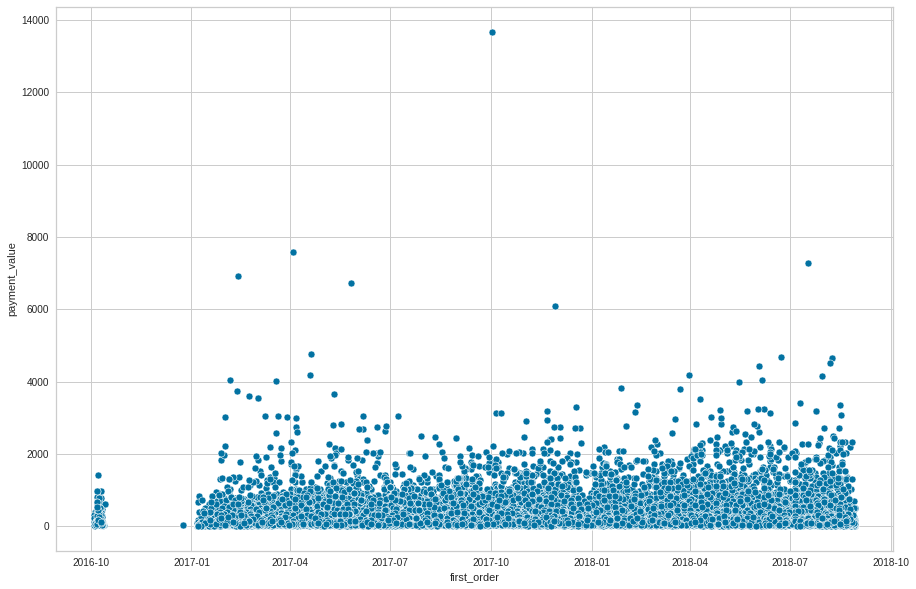

In [7]:
fig, axes = plt.subplots(nrows=1,figsize=(15,10))

sns.scatterplot(data=RFM, x='first_order', y='payment_value', palette= 'bright')

In [8]:
#Aprés quelques commandes (de test ?) fin 2016, les commandes commencent début 2017


## Testons le modèle sur base RFM, testons sa pertinence au fil du temps 

In [9]:
RFM[['payment_value','Recence','order_count','last_order']].describe(include= 'all' ) 

<ipython-input-9-3ab0d39e3bb4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  RFM[['payment_value','Recence','order_count','last_order']].describe(include= 'all' )


,payment_value,Recence,order_count,last_order
count,96558.000000,96558.000000,96558.000000,96558
unique,NaN,NaN,NaN,85053
top,NaN,NaN,NaN,2018-08-20 19:30:05
freq,NaN,NaN,NaN,17
first,NaN,NaN,NaN,2016-10-04 09:43:32
last,NaN,NaN,NaN,2018-08-29 15:10:26
mean,171.122086,1794.541682,1.081081,NaN
std,232.840350,152.374379,0.388135,NaN
min,9.590000,1558.053289,1.000000,NaN
25%,64.100000,1671.206258,1.000000,NaN


In [10]:

RFM2017 = RFM[['payment_value','Recence','order_count','last_order']][RFM['last_order']<="31/12/2017"]

In [11]:
RFM2017.describe( datetime_is_numeric= True) 

,payment_value,Recence,order_count,last_order
count,42904.000000,42904.000000,42904.000000,42904
mean,168.646816,1937.318751,1.066917,2017-08-15 08:48:10.062861312
min,10.070000,1799.722768,1.000000,2016-10-04 09:43:32
25%,64.000000,1846.507974,1.000000,2017-06-01 11:04:46.249999872
50%,108.100000,1922.029551,1.000000,2017-08-30 15:44:37
75%,186.347500,2012.223888,1.000000,2017-11-14 04:15:41.249999872
max,13664.080000,2252.280303,6.000000,2017-12-30 23:06:23
std,238.554392,97.763025,0.283774,NaN


In [12]:
X= RFM2017.drop(columns= 'last_order')
X.describe()

,payment_value,Recence,order_count
count,42904.000000,42904.000000,42904.000000
mean,168.646816,1937.318751,1.066917
std,238.554392,97.763025,0.283774
min,10.070000,1799.722768,1.000000
25%,64.000000,1846.507974,1.000000
50%,108.100000,1922.029551,1.000000
75%,186.347500,2012.223888,1.000000
max,13664.080000,2252.280303,6.000000


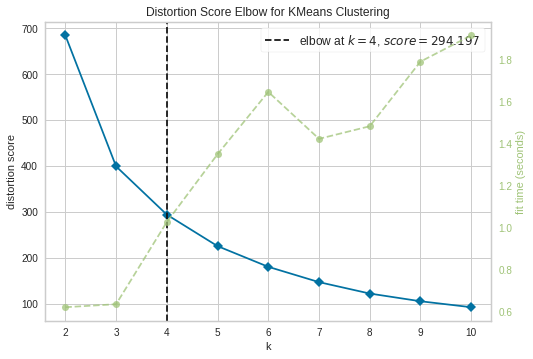

In [13]:
scaler = MinMaxScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

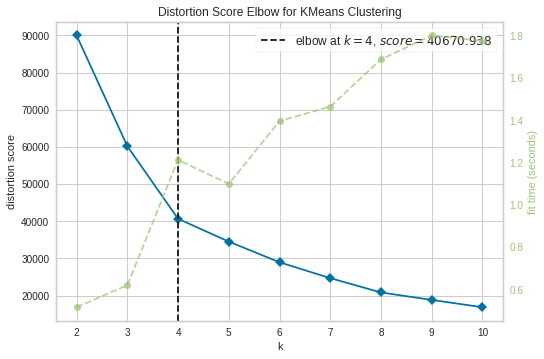

11.99352240562439  secondes


In [14]:
debut = time.time() 

scaler = StandardScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(random_state=22),K=(2,15)))])
debut = time.time()
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()
print ( time.time() - debut ,' secondes')

In [15]:

scaler = StandardScaler()
numerical_features = X.select_dtypes(include= 'number').columns.tolist()
preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])


Le meilleur score Silhouette est obtenu avec 4 clusters  

In [16]:
kmeans2017 = Pipeline([
                        ("preprocessor", preprocessor),
                        ("Kmeans", KMeans(n_clusters=4, random_state=22).fit(X))])
 

In [17]:
debut = time.time()
kmeans2017.fit(X)
y_kmeans2017 = kmeans2017.predict(X)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, y_kmeans2017))
print ( time.time() - debut ,' secondes')

Silhouette Coefficient: 0.306
23.049246549606323  secondes


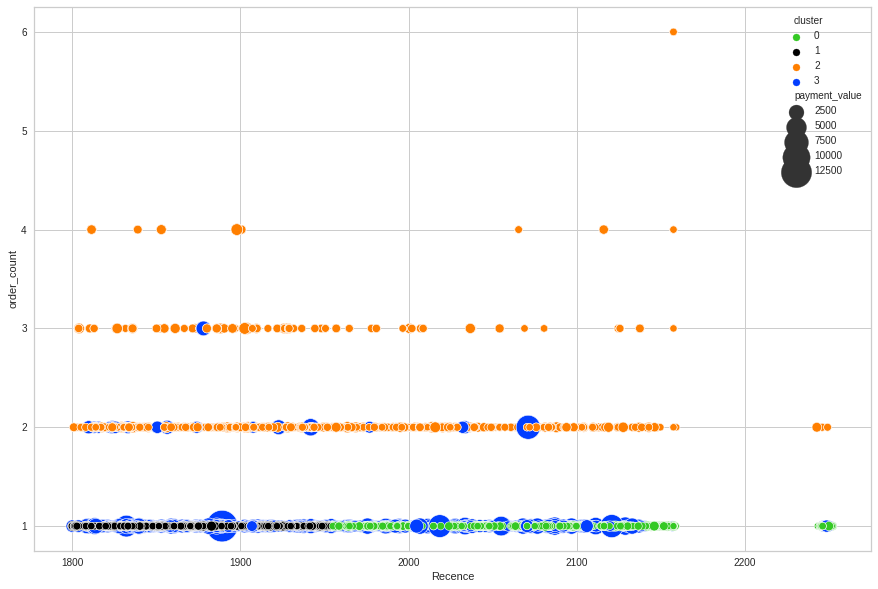

In [18]:
RFM_ML = X
RFM_ML['cluster']=y_kmeans2017

fig, axes = plt.subplots(nrows=1,figsize=(15,10))
palette = sns.color_palette(["#34C924","#000000","#ff7f00","#023eff"])
#"#ffc400" rouge : #FF0000 noir : "#000000" jaune : #ffc400 vert : #34C924 bleue : "#023eff" orange : "#ff7f00"
sns.scatterplot( data=RFM_ML, x='Recence', y='order_count',hue= 'cluster',size='payment_value',
                sizes=(50, 1000), palette= palette)

## Comparons les scores avec le fit 2017 et le fit mis à jour

In [19]:
Report = pd.DataFrame(columns=['Date', 'silhouette_2017',' silhouette_2018','ARI','Durée']) 
kmeans2018 = Pipeline([
                       ("preprocessor", preprocessor),
                       ("Kmeans", KMeans(n_clusters=4, random_state=22).fit(X))])
#initialisation tableau de reporting total 

In [20]:

for periode in pd.date_range(start='2018/01/1', 
                             end='2018/12/31', freq='W' ) :
    debut= time.time() 
    RFM2018 = RFM[['payment_value','Recence','order_count','last_order']][(RFM['last_order']<=periode)]
    X = RFM2018.drop(columns ="last_order" )
    
    y_kmeans2017 = kmeans2017.predict(X)
    silhouette_2017=metrics.silhouette_score(X , y_kmeans2017)
    
    kmeans2018.fit(X)
    y_kmeans2018 = kmeans2018.predict(X)
    silhouette_2018 = metrics.silhouette_score(X , y_kmeans2018)
    
    ARI =  adjusted_rand_score(y_kmeans2017,y_kmeans2018)
    
    delay = time.time()- debut
    
    Append= pd.DataFrame([[periode,silhouette_2017,silhouette_2018,ARI ,delay ]],
                         columns= ['Date', 'silhouette_2017',' silhouette_2018','ARI','Durée'])
              
    display (Append) 
    Report = pd.concat([Report, Append]) 
    Report
    
    

,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-01-07,0.310183,0.311753,0.97785,46.848394


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-01-14,0.314476,0.315978,0.951484,50.201672


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-01-21,0.317298,0.31938,0.9444,54.68673


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-01-28,0.321226,0.323103,0.971878,57.31444


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-02-04,0.323388,0.325668,0.965144,60.686808


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-02-11,0.325799,0.327797,0.969576,61.86263


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-02-18,0.327747,0.331705,0.981899,68.491623


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-02-25,0.329225,0.334598,0.980976,74.842245


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-03-04,0.331416,0.33611,0.988939,77.368374


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-03-11,0.332383,0.337277,0.988463,81.80773


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-03-18,0.333265,0.338524,0.973791,86.259202


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-03-25,0.334062,0.339141,0.983277,88.87541


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-04-01,0.335397,0.340274,0.970278,93.100644


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-04-08,0.335996,0.340063,0.980549,100.245012


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-04-15,0.33707,0.341384,0.967526,102.712841


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-04-22,0.338171,0.342781,0.969588,108.500421


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-04-29,0.338991,0.343397,0.966536,114.06631


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-05-06,0.339799,0.344198,0.967787,117.019576


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-05-13,0.341173,0.34516,0.958468,123.393129


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-05-20,0.342092,0.346555,0.956123,132.857416


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-05-27,0.342029,0.346648,0.942773,135.944241


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-06-03,0.3425,0.346586,0.939757,137.279253


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-06-10,0.341273,0.345498,0.951655,144.14395


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-06-17,0.340585,0.344794,0.953275,143.615149


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-06-24,0.342108,0.346302,0.956146,156.014212


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-07-01,0.341573,0.346201,0.95029,168.773245


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-07-08,0.340594,0.346013,0.941636,175.773613


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-07-15,0.339479,0.345172,0.934601,181.979687


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-07-22,0.338862,0.34441,0.928931,188.190843


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-07-29,0.337773,0.342565,0.931759,185.529966


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-08-05,0.336803,0.341272,0.938707,185.14311


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-08-12,0.335556,0.337915,0.928343,191.519954


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-08-19,0.337734,0.340253,0.928987,202.690943


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-08-26,0.340341,0.341652,0.932066,205.909976


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-09-02,0.33876,0.342486,0.948455,217.096819


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-09-09,0.338818,0.342486,0.950682,223.106776


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-09-16,0.338818,0.342486,0.950682,220.6369


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-09-23,0.338818,0.342486,0.950682,220.030464


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-09-30,0.338818,0.342486,0.950682,220.689276


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-10-07,0.338818,0.342486,0.950682,220.33962


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-10-14,0.338818,0.342486,0.950682,225.652676


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-10-21,0.338818,0.342486,0.950682,226.547246


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-10-28,0.338818,0.342486,0.950682,225.858301


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-11-04,0.338818,0.342486,0.950682,225.671818


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-11-11,0.338818,0.342486,0.950682,206.202005


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-11-18,0.338818,0.342486,0.950682,208.714293


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-11-25,0.338818,0.342486,0.950682,211.727523


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-12-02,0.338818,0.342486,0.950682,214.269175


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-12-09,0.338818,0.342486,0.950682,206.877773


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-12-16,0.338818,0.342486,0.950682,204.992448


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-12-23,0.338818,0.342486,0.950682,208.383365


,Date,silhouette_2017,silhouette_2018,ARI,Durée
0,2018-12-30,0.338818,0.342486,0.950682,206.562692


In [21]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    Report.to_csv("/content/drive/MyDrive/Notebooks/P5 Git/Report712M.csv")

except ModuleNotFoundError :
    Report.to_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5 Git\Report712M.csv')

Mounted at /content/drive


In [22]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
    report = pd.read_csv("/content/drive/MyDrive/Notebooks/P5/Report2811-tranche1.csv")

except ModuleNotFoundError :
    report = pd.read_csv(r'C:\Users\Hugues\gdrive\Notebooks\P5\Report2811-tranche1.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
report= Report

In [30]:
report.describe(include = 'all')

<ipython-input-30-a5e83bb126ad>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  report.describe(include = 'all')


,Date,silhouette_2017,silhouette_2018,ARI,Durée
count,52,52.000000,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN,NaN
top,2018-01-07 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
first,2018-01-07 00:00:00,NaN,NaN,NaN,NaN
last,2018-12-30 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,0.335866,0.339709,0.955452,153.788614
std,NaN,0.007165,0.007790,0.015591,61.132721
min,NaN,0.310183,0.311753,0.928343,46.848394
25%,NaN,0.335516,0.339833,0.950584,98.458920


In [31]:
report.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 0
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              52 non-null     datetime64[ns]
 1   silhouette_2017   52 non-null     float64       
 2    silhouette_2018  52 non-null     float64       
 3   ARI               52 non-null     float64       
 4   Durée             52 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.4 KB


In [32]:
report.sum()

<ipython-input-32-46435615a2d1>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  report.sum()


silhouette_2017       17.465041
 silhouette_2018      17.664866
ARI                   49.683514
Durée               7997.007918
dtype: float64

In [38]:
report = (report.reset_index())

In [39]:
index = report.index.tolist()

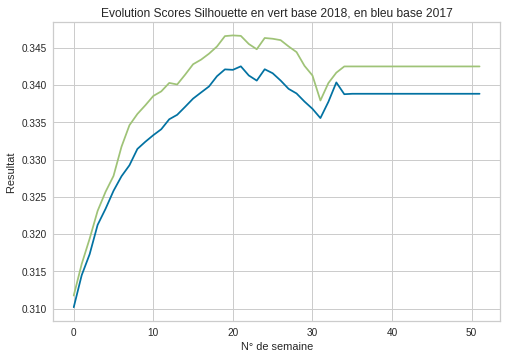

In [40]:
fig, ax = plt.subplots()
ax.set(
    xlabel="N° de semaine",
    ylabel="Resultat ",
    title="Evolution Scores Silhouette en vert base 2018, en bleu base 2017",
    #xlim=(xmin, xmax),
    #yticks=['test'],
    #xticklabels=[],
)
ax= sns.lineplot(data=report, x=index,y='silhouette_2017', palette= 'bright')
ax1 = sns.lineplot(data=report, x=index,y=' silhouette_2018', palette= 'bright')

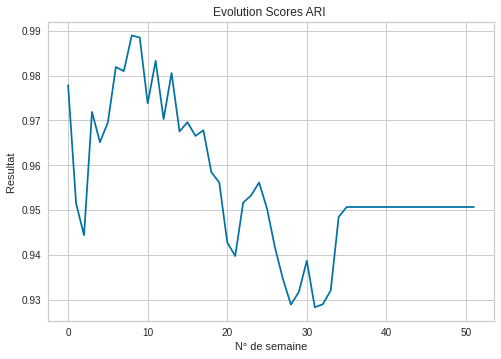

In [41]:
fig, ax = plt.subplots()
ax.set(
    xlabel="N° de semaine",
    ylabel="Resultat ",
    title="Evolution Scores ARI ",
    #xlim=(xmin, xmax),
    #yticks=['test'],
    #xticklabels=[],
)
#ax= sns.lineplot(data=report, x='Date',y='silhouette_2017', palette= 'bright')
#ax1 = sns.lineplot(data=report, x='Date',y=' silhouette_2018', palette= 'bright')

ax2 = sns.lineplot(data=report, x=index,y='ARI', palette= 'bright')
#ax2.set_ylim(0, 1)